Prepared the data for ML,
Performed feature selection and
Conducted both kNN and random forest classification

In [9]:

import pandas as pd

# Load the file to inspect its contents
from google.colab import files
uploaded = files.upload()

Saving ml_data.csv to ml_data.csv


In [10]:
# Load the dataset
df2=pd.read_csv('ml_data.csv') #read from the dataset
df2


,Unnamed: 0,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000288610,ENSG00000288611,ENSG00000288612,ENSG00000288637,ENSG00000288638,ENSG00000288658,ENSG00000288663,ENSG00000288670,ENSG00000288674,ENSG00000288675
0,TCGA-44-2661-11A-01R-1758-07,1395,8,1031,541,135,3245,9854,1898,970,...,0,9,20,1,0,15,14,231,16,11
1,TCGA-55-6986-11A-01R-1949-07,6760,3,2070,1110,202,4876,7059,2671,3160,...,1,29,45,3,0,20,37,448,10,8
2,TCGA-49-6744-11A-01R-1858-07,1353,2,842,417,106,2699,3892,1312,776,...,2,6,10,0,0,72,6,195,4,3
3,TCGA-44-6776-11A-01R-1858-07,1200,2,909,373,70,2123,1801,1053,619,...,1,1,18,1,0,29,5,173,5,6
4,TCGA-55-6979-11A-01R-1949-07,513,0,585,304,77,3081,1650,1076,714,...,6,1,16,0,0,1,3,98,4,3
5,TCGA-44-6146-11A-01R-1858-07,548,1,722,403,73,1535,4009,1101,441,...,1,1,19,0,0,4,12,115,9,1
6,TCGA-50-5939-11A-01R-1628-07,829,6,829,334,93,2289,3190,1294,530,...,1,4,13,0,0,16,6,176,6,3
7,TCGA-91-6829-11A-01R-1858-07,780,2,789,406,146,10095,1172,2228,1375,...,3,8,27,1,0,7,23,118,3,11
8,TCGA-38-4626-11A-01R-1758-07,2370,1,2770,621,166,17257,2921,3076,2724,...,1,11,51,3,0,11,31,206,9,11
9,TCGA-55-6980-11A-01R-1949-07,618,0,570,346,78,1476,1961,862,339,...,3,1,19,1,0,5,17,107,10,6


In [11]:
# Rename the first column
df2.rename(columns={df2.columns[0]: 'barcode'}, inplace=True)
print(df2.head())
df2

                        barcode  ENSG00000000003  ENSG00000000005  \
0  TCGA-44-2661-11A-01R-1758-07             1395                8   
1  TCGA-55-6986-11A-01R-1949-07             6760                3   
2  TCGA-49-6744-11A-01R-1858-07             1353                2   
3  TCGA-44-6776-11A-01R-1858-07             1200                2   
4  TCGA-55-6979-11A-01R-1949-07              513                0   

   ENSG00000000419  ENSG00000000457  ENSG00000000460  ENSG00000000938  \
0             1031              541              135             3245   
1             2070             1110              202             4876   
2              842              417              106             2699   
3              909              373               70             2123   
4              585              304               77             3081   

   ENSG00000000971  ENSG00000001036  ENSG00000001084  ...  ENSG00000288610  \
0             9854             1898              970  ...           

,barcode,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000288610,ENSG00000288611,ENSG00000288612,ENSG00000288637,ENSG00000288638,ENSG00000288658,ENSG00000288663,ENSG00000288670,ENSG00000288674,ENSG00000288675
0,TCGA-44-2661-11A-01R-1758-07,1395,8,1031,541,135,3245,9854,1898,970,...,0,9,20,1,0,15,14,231,16,11
1,TCGA-55-6986-11A-01R-1949-07,6760,3,2070,1110,202,4876,7059,2671,3160,...,1,29,45,3,0,20,37,448,10,8
2,TCGA-49-6744-11A-01R-1858-07,1353,2,842,417,106,2699,3892,1312,776,...,2,6,10,0,0,72,6,195,4,3
3,TCGA-44-6776-11A-01R-1858-07,1200,2,909,373,70,2123,1801,1053,619,...,1,1,18,1,0,29,5,173,5,6
4,TCGA-55-6979-11A-01R-1949-07,513,0,585,304,77,3081,1650,1076,714,...,6,1,16,0,0,1,3,98,4,3
5,TCGA-44-6146-11A-01R-1858-07,548,1,722,403,73,1535,4009,1101,441,...,1,1,19,0,0,4,12,115,9,1
6,TCGA-50-5939-11A-01R-1628-07,829,6,829,334,93,2289,3190,1294,530,...,1,4,13,0,0,16,6,176,6,3
7,TCGA-91-6829-11A-01R-1858-07,780,2,789,406,146,10095,1172,2228,1375,...,3,8,27,1,0,7,23,118,3,11
8,TCGA-38-4626-11A-01R-1758-07,2370,1,2770,621,166,17257,2921,3076,2724,...,1,11,51,3,0,11,31,206,9,11
9,TCGA-55-6980-11A-01R-1949-07,618,0,570,346,78,1476,1961,862,339,...,3,1,19,1,0,5,17,107,10,6


In [12]:
from google.colab import files
uploaded = files.upload()

Saving simpleMeta.csv to simpleMeta.csv


In [13]:
df4=pd.read_csv('simpleMeta.csv') #read from the dataset
df4.head(), df4.shape
df4

,Unnamed: 0,barcode,race,tumor_type
0,1,TCGA-73-4658-01A-01R-1755-07,white,Tumor
1,2,TCGA-44-2661-11A-01R-1758-07,white,Normal
2,3,TCGA-55-6986-11A-01R-1949-07,white,Normal
3,4,TCGA-55-8615-01A-11R-2403-07,white,Tumor
4,5,TCGA-97-8177-01A-11R-2287-07,white,Tumor
...,...,...,...,...
595,596,TCGA-64-1678-01A-01R-0946-07,white,Tumor
596,597,TCGA-78-7155-01A-11R-2039-07,white,Tumor
597,598,TCGA-78-7220-01A-11R-2039-07,white,Tumor
598,599,TCGA-80-5611-01A-01R-1628-07,not reported,Tumor


In [14]:
data1=df2  #gene count data (ml_data)
data2=df4   #metadata (simpleMeta)

In [15]:
# Merge the two dataframes on a common column, in this case 'barcode'
merged_df = pd.merge(data1, data2, on='barcode', how='inner')

In [16]:
merged_df.head(), merged_df.shape

(                        barcode  ENSG00000000003  ENSG00000000005  \
 0  TCGA-44-2661-11A-01R-1758-07             1395                8   
 1  TCGA-55-6986-11A-01R-1949-07             6760                3   
 2  TCGA-49-6744-11A-01R-1858-07             1353                2   
 3  TCGA-44-6776-11A-01R-1858-07             1200                2   
 4  TCGA-55-6979-11A-01R-1949-07              513                0   
 
    ENSG00000000419  ENSG00000000457  ENSG00000000460  ENSG00000000938  \
 0             1031              541              135             3245   
 1             2070             1110              202             4876   
 2              842              417              106             2699   
 3              909              373               70             2123   
 4              585              304               77             3081   
 
    ENSG00000000971  ENSG00000001036  ENSG00000001084  ...  ENSG00000288637  \
 0             9854             1898              970

In [17]:
merged_df

,barcode,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000288637,ENSG00000288638,ENSG00000288658,ENSG00000288663,ENSG00000288670,ENSG00000288674,ENSG00000288675,Unnamed: 0,race,tumor_type
0,TCGA-44-2661-11A-01R-1758-07,1395,8,1031,541,135,3245,9854,1898,970,...,1,0,15,14,231,16,11,2,white,Normal
1,TCGA-55-6986-11A-01R-1949-07,6760,3,2070,1110,202,4876,7059,2671,3160,...,3,0,20,37,448,10,8,3,white,Normal
2,TCGA-49-6744-11A-01R-1858-07,1353,2,842,417,106,2699,3892,1312,776,...,0,0,72,6,195,4,3,6,white,Normal
3,TCGA-44-6776-11A-01R-1858-07,1200,2,909,373,70,2123,1801,1053,619,...,1,0,29,5,173,5,6,25,white,Normal
4,TCGA-55-6979-11A-01R-1949-07,513,0,585,304,77,3081,1650,1076,714,...,0,0,1,3,98,4,3,32,white,Normal
5,TCGA-44-6146-11A-01R-1858-07,548,1,722,403,73,1535,4009,1101,441,...,0,0,4,12,115,9,1,33,white,Normal
6,TCGA-50-5939-11A-01R-1628-07,829,6,829,334,93,2289,3190,1294,530,...,0,0,16,6,176,6,3,34,white,Normal
7,TCGA-91-6829-11A-01R-1858-07,780,2,789,406,146,10095,1172,2228,1375,...,1,0,7,23,118,3,11,46,white,Normal
8,TCGA-38-4626-11A-01R-1758-07,2370,1,2770,621,166,17257,2921,3076,2724,...,3,0,11,31,206,9,11,51,white,Normal
9,TCGA-55-6980-11A-01R-1949-07,618,0,570,346,78,1476,1961,862,339,...,1,0,5,17,107,10,6,53,white,Normal


In [18]:
#Prepare the feature (gene count data) and target (tissue_type)
features = merged_df.drop(columns=['barcode', 'race', 'tumor_type']) # gene count columns
target = merged_df['tumor_type']  # tumor_type (target)

# Check the dimensions of the features and target
features_shape = features.shape
target_shape = target.shape

features_shape, target_shape

((40, 34700), (40,))

In [19]:
from sklearn.feature_selection import VarianceThreshold

# Apply variance thresholding to remove features (genes) with low variance
variance_threshold = 0.1  # Adjust threshold to select features with sufficient variance
selector = VarianceThreshold(threshold=variance_threshold)
features_reduced = selector.fit_transform(features)

# Check the new dimensions of the dataset after feature selection
features_reduced.shape

(40, 34700)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features_reduced, target, test_size=0.2, random_state=42, stratify=target)

# Scale the features for kNN (kNN requires feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shapes of the training and testing sets
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((32, 34700), (8, 34700), (32,), (8,))

In [21]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [22]:
# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [23]:
#SAVE model
import joblib
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

In [24]:
#load model
rf_model = joblib.load('rf_model.pkl')

In [25]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [26]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)



In [27]:
# Print the results
print("Random Forest Model Accuracy: {:.2f}%".format(accuracy * 100))
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Random Forest Model Accuracy: 100.00%

Confusion Matrix:
 [[4 0]
 [0 4]]

Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         4
       Tumor       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



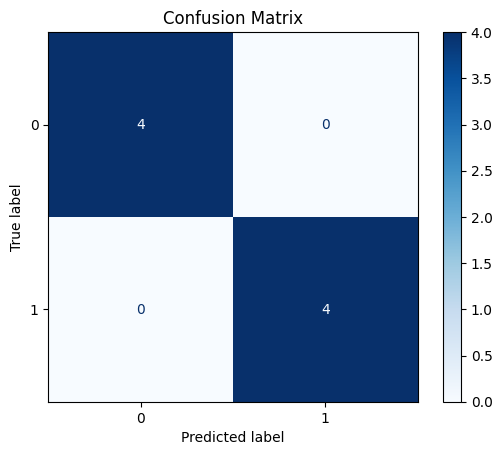

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [57]:
# Get the predicted probabilities for the positive class 'Tumor'
y_prob = rf_model.predict_proba(X_test)[:, 1]

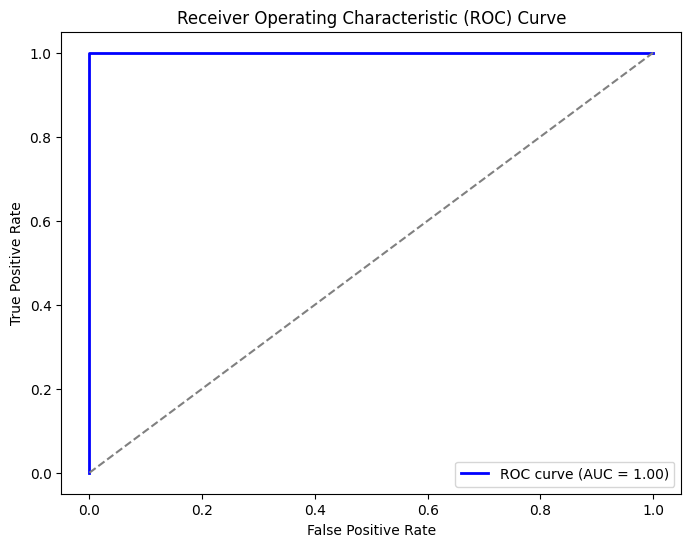

In [58]:
from sklearn.metrics import roc_curve, auc

# Assuming y_prob contains predicted probabilities for the positive class ('Tumor')
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label='Tumor')
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [28]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
# Initialize the kNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)


In [30]:
# Train the model
knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [31]:
# Save model
import joblib
joblib.dump(knn_model, 'knn_model.pkl')

['knn_model.pkl']

In [32]:
#Load model
knn_model = joblib.load('knn_model.pkl')

In [33]:
# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

In [34]:
# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)


In [35]:
# Print the results
print("kNN Model Accuracy: {:.2f}%".format(accuracy_knn * 100))
print("\nConfusion Matrix:\n", conf_matrix_knn)
print("\nClassification Report:\n", class_report_knn)

kNN Model Accuracy: 75.00%

Confusion Matrix:
 [[4 0]
 [2 2]]

Classification Report:
               precision    recall  f1-score   support

      Normal       0.67      1.00      0.80         4
       Tumor       1.00      0.50      0.67         4

    accuracy                           0.75         8
   macro avg       0.83      0.75      0.73         8
weighted avg       0.83      0.75      0.73         8



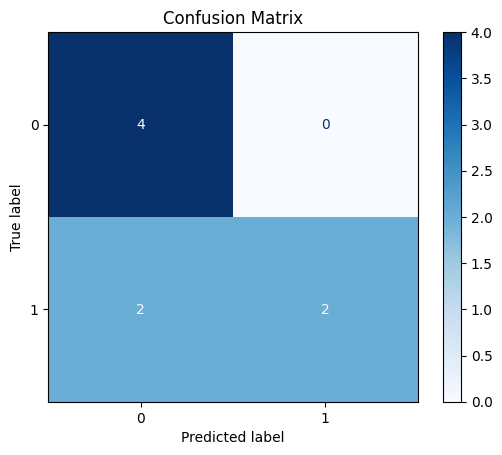

In [38]:
#Plot Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [59]:
# Get the predicted probabilities for the positive class 'Tumor'
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

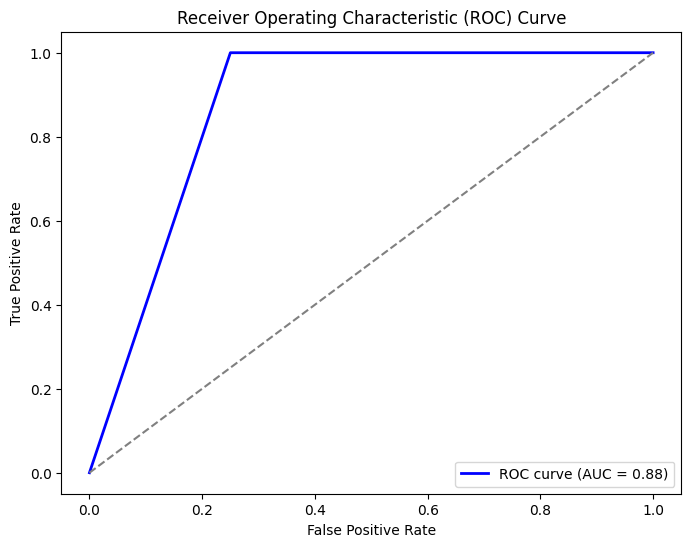

In [60]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC, specifying 'Tumor' as the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob_knn, pos_label='Tumor')
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


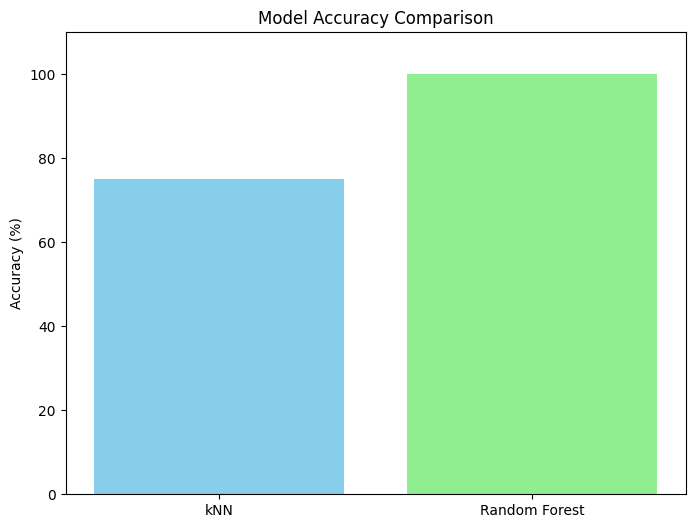

In [61]:
#Accuracy comparison of both models
import matplotlib.pyplot as plt

accuracy_scores = {'kNN': 75.0, 'Random Forest': 100}
models = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

plt.figure(figsize=(8, 6))
plt.bar(models, scores, color=['skyblue', 'lightgreen'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 110)  # Adjust y-axis to cover the range 0-100%
plt.show()
